In [2]:
#import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
#Add the latitudes and longitudes to a list. 
coordinates = list (lat_lngs)




In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

644

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

    

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print (url)
# city_url = url + "&q=" + "Boston"
# print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=0ebd53514de3f16cf04e362d3ca9718a


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 1 | lebu
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | torbay
Processing Record 5 of Set 1 | broome
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | khasan
Processing Record 8 of Set 1 | egvekinot
Processing Record 9 of Set 1 | ahipara
Processing Record 10 of Set 1 | bourail
Processing Record 11 of Set 1 | kimbe
Processing Record 12 of Set 1 | chake chake
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | viedma
Processing Record 16 of Set 1 | kodiak
Processing Record 17 of Set 1 | tuktoyaktuk
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | busselton
Processing Record 20 of Set 1 | ribeira grande
Processing Record 21 of Set 1 | nanortalik
Processing Record 22 of Set 1 | port alfred
Processing Recor

Processing Record 38 of Set 4 | poum
Processing Record 39 of Set 4 | kushiro
Processing Record 40 of Set 4 | chapais
Processing Record 41 of Set 4 | santa fe
Processing Record 42 of Set 4 | east wenatchee bench
Processing Record 43 of Set 4 | hithadhoo
Processing Record 44 of Set 4 | lermontovka
Processing Record 45 of Set 4 | kudahuvadhoo
Processing Record 46 of Set 4 | faanui
Processing Record 47 of Set 4 | taltal
Processing Record 48 of Set 4 | tadine
Processing Record 49 of Set 4 | terenos
Processing Record 50 of Set 4 | tigil
Processing Record 1 of Set 5 | la asuncion
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | kihei
Processing Record 4 of Set 5 | manakara
Processing Record 5 of Set 5 | sorland
Processing Record 6 of Set 5 | viligili
City not found. Skipping...
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | miles city
Processing Record 9 of Set 5 | vanimo
Processing Record 10 of Set 5 | viga
Processing Record 11 of Set 5 | rio

Processing Record 29 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 30 of Set 8 | vuktyl
Processing Record 31 of Set 8 | bintulu
Processing Record 32 of Set 8 | charters towers
Processing Record 33 of Set 8 | aberystwyth
Processing Record 34 of Set 8 | tunduru
City not found. Skipping...
Processing Record 35 of Set 8 | champasak
Processing Record 36 of Set 8 | marcona
City not found. Skipping...
Processing Record 37 of Set 8 | feijo
Processing Record 38 of Set 8 | henties bay
Processing Record 39 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 40 of Set 8 | longkou
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | flin flon
Processing Record 43 of Set 8 | cap malheureux
Processing Record 44 of Set 8 | inuvik
Processing Record 45 of Set 8 | neiafu
Processing Record 46 of Set 8 | rocha
Processing Record 47 of Set 8 | olinda
Processing Record 48 of Set 8 | angoche
Processing Record 49 of Set 8 | baykit
Processing Record 50 of Set

Processing Record 17 of Set 12 | khandyga
Processing Record 18 of Set 12 | muisne
Processing Record 19 of Set 12 | samarai
Processing Record 20 of Set 12 | karkaralinsk
City not found. Skipping...
Processing Record 21 of Set 12 | shenzhen
Processing Record 22 of Set 12 | adamas
Processing Record 23 of Set 12 | vrangel
Processing Record 24 of Set 12 | la rioja
Processing Record 25 of Set 12 | hailun
Processing Record 26 of Set 12 | mumford
Processing Record 27 of Set 12 | matagami
Processing Record 28 of Set 12 | cao bang
Processing Record 29 of Set 12 | merauke
Processing Record 30 of Set 12 | marawi
Processing Record 31 of Set 12 | kuah
Processing Record 32 of Set 12 | coxim
Processing Record 33 of Set 12 | pavlodar
Processing Record 34 of Set 12 | ischia
Processing Record 35 of Set 12 | san severino marche
Processing Record 36 of Set 12 | manta
Processing Record 37 of Set 12 | cody
Processing Record 38 of Set 12 | ixtapa
Processing Record 39 of Set 12 | kuche
City not found. Skipping

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Lebu,-37.6167,-73.6500,52.43,78,98,12.66,CL,2022-04-27 15:01:22
1,Longyearbyen,78.2186,15.6401,4.84,56,75,10.36,SJ,2022-04-27 15:01:22
2,Torbay,47.6666,-52.7314,47.75,83,100,3.71,CA,2022-04-27 15:01:22
3,Broome,42.2506,-75.8330,41.70,71,100,8.99,US,2022-04-27 15:01:23
4,Rikitea,-23.1203,-134.9692,77.02,74,72,23.62,PF,2022-04-27 15:01:23
5,Khasan,42.4308,130.6434,49.12,35,100,8.97,RU,2022-04-27 15:01:24
6,Egvekinot,66.3167,-179.1667,16.79,85,99,5.84,RU,2022-04-27 15:01:24
7,Ahipara,-35.1667,173.1667,60.15,66,73,5.12,NZ,2022-04-27 15:01:24
8,Bourail,-21.5667,165.4833,69.15,81,100,3.91,NC,2022-04-27 15:01:25
9,Kimbe,-5.5502,150.1429,76.51,93,45,3.74,PG,2022-04-27 15:01:25


In [13]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Lebu,CL,2022-04-27 15:01:22,-37.6167,-73.6500,52.43,78,98,12.66
1,Longyearbyen,SJ,2022-04-27 15:01:22,78.2186,15.6401,4.84,56,75,10.36
2,Torbay,CA,2022-04-27 15:01:22,47.6666,-52.7314,47.75,83,100,3.71
3,Broome,US,2022-04-27 15:01:23,42.2506,-75.8330,41.70,71,100,8.99
4,Rikitea,PF,2022-04-27 15:01:23,-23.1203,-134.9692,77.02,74,72,23.62
...,...,...,...,...,...,...,...,...,...
589,Krasnyy,RU,2022-04-27 15:17:01,54.5678,31.4333,47.48,59,92,7.16
590,Syracuse,IT,2022-04-27 15:14:06,37.0881,15.2792,71.31,58,53,3.31
591,Morristown,US,2022-04-27 15:17:02,36.2140,-83.2949,58.95,55,0,4.85
592,Mae Sai,TH,2022-04-27 15:17:02,20.4335,99.8762,82.65,48,10,1.50


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [15]:
#Extract relevant fields from the DataFrame for plotting#
lats = city_data_df["Lat"]
max_temps= city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

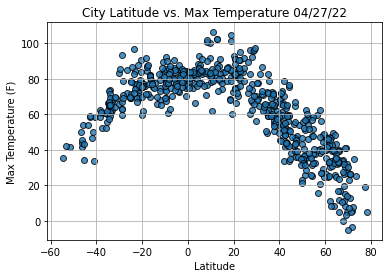

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

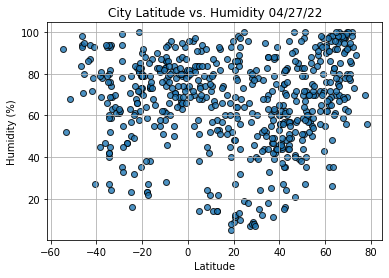

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

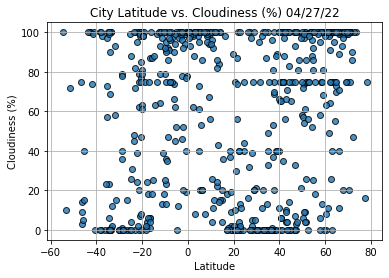

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

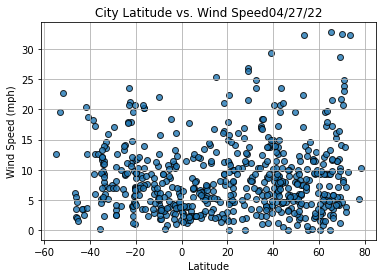

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed" + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    
    # Run regression on  hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10,40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show() 

In [24]:
index13 =city_data_df.loc[13]
index13

City                       Viedma
Country                        AR
Date          2022-04-27 15:00:34
Lat                      -40.8135
Lng                      -62.9967
Max Temp                    58.48
Humidity                       27
Cloudiness                      0
Wind Speed                   18.7
Name: 13, dtype: object

In [25]:
#Use loc to determine information in one column of a data frame

city_data_df["Lat"] >= 0

0      False
1       True
2       True
3       True
4      False
       ...  
589     True
590     True
591     True
592     True
593     True
Name: Lat, Length: 594, dtype: bool

In [26]:
#Use loc to retrieve specific information from one column of a data frame
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Longyearbyen,SJ,2022-04-27 15:01:22,78.2186,15.6401,4.84,56,75,10.36
2,Torbay,CA,2022-04-27 15:01:22,47.6666,-52.7314,47.75,83,100,3.71
3,Broome,US,2022-04-27 15:01:23,42.2506,-75.8330,41.70,71,100,8.99
5,Khasan,RU,2022-04-27 15:01:24,42.4308,130.6434,49.12,35,100,8.97
6,Egvekinot,RU,2022-04-27 15:01:24,66.3167,-179.1667,16.79,85,99,5.84


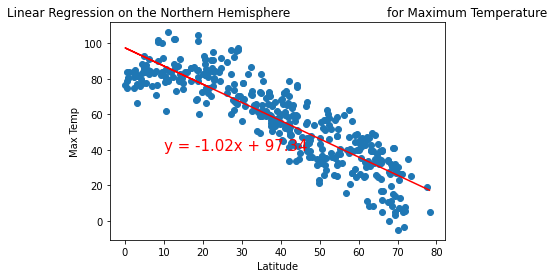

In [36]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,20))

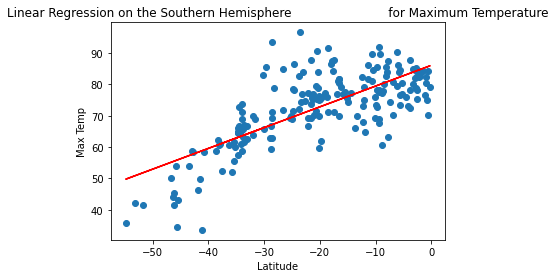

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-20,50))

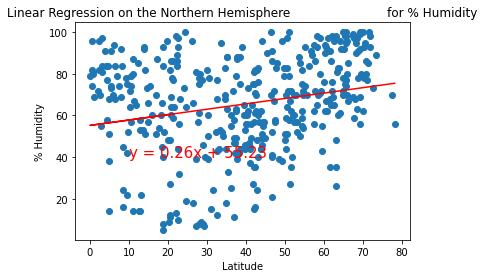

In [45]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

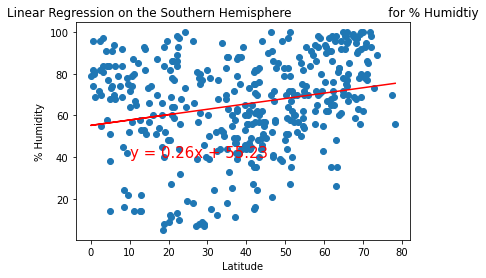

In [41]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidtiy', '% Humidity',(-50,15))

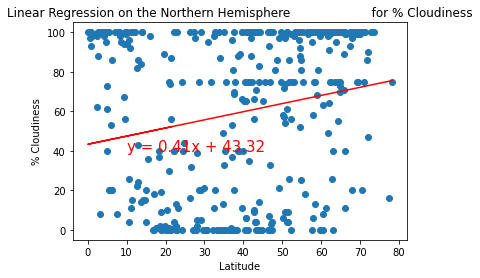

In [43]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Northern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(10,55))

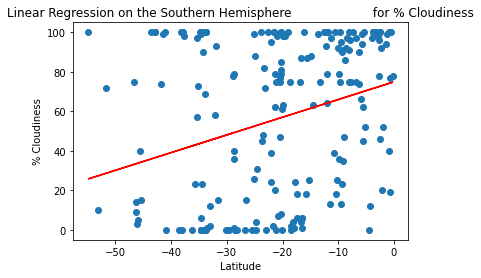

In [44]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function
plot_linear_regression(x_values, y_values,
                   'Linear Regression on the Southern Hemisphere \
                    for % Cloudiness', '% Cloudiness',(-50,60))

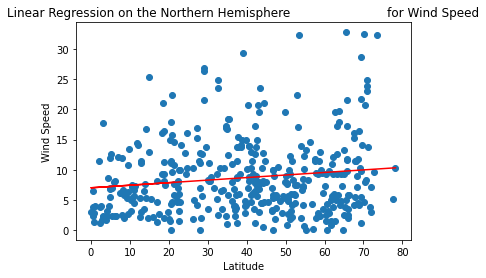

In [47]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))